# Challenge 1 - Analyzing POS Data
Completed by Christopher Stephan

## Loading & Understanding the Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [5]:
#adjust the display settings to be able to better understand our data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows (if needed)

### POS Data

In [6]:
pos_data = pd.read_csv("POS_data.csv")
super_data = pd.read_csv("supermarket_POS_data.csv")

In [7]:
pos_data.head()

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam


In [8]:
#Extracting the total rows and columns in our pos dataset
pos_data.shape

(21293, 4)

In [9]:
pos_data.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [10]:
# changing the date and time to a datetime object 
pos_data['datetime'] = pd.to_datetime(pos_data['Date'].astype(str) + ' ' + pos_data['Time'].astype(str))

In [11]:
#removing the date and time columns as they are now redundant 
pos_data = pos_data.drop(columns = ['Date', 'Time'], axis=1)

In [12]:
pos_data.dtypes

Transaction             int64
Item                   object
datetime       datetime64[ns]
dtype: object

In [13]:
#Checking if any of the rows are duplicated in the dataset
print(f'There are {pos_data.duplicated().sum()} duplicated rows in our pos dataset.')

There are 1653 duplicated rows in our pos dataset.


In [14]:
#Rename columns for better readability
pos_data = pos_data.rename(columns={
    'Transaction': 'transaction',
    'Item': 'item',
})

#Confirm the column names are updated
pos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   transaction  21293 non-null  int64         
 1   item         21293 non-null  object        
 2   datetime     21293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 499.2+ KB


In [15]:
pos_data.isna().mean()

transaction    0.0
item           0.0
datetime       0.0
dtype: float64

**The dataset is complete, no missing values**

In [16]:
#Summary statistics for integer & float features
pos_data.describe()

,transaction,datetime
count,21293.000000,21293
mean,4951.990889,2017-01-17 14:54:19.669234176
min,1.000000,2016-10-30 09:58:11
25%,2548.000000,2016-12-03 14:07:07
50%,5067.000000,2017-01-21 12:34:58
75%,7329.000000,2017-02-28 10:58:04
max,9684.000000,2017-04-09 15:04:24
std,2787.758400,NaN


### SuperMarket Data

In [17]:
super_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [18]:
#Extracting the total rows and columns in our supermarket dataset
super_data.shape

(1000, 17)

In [19]:
super_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [20]:
#Checking if any of the rows are duplicated in the dataset
print(f'There are {super_data.duplicated().sum()} duplicated rows in our pos dataset.')

There are 0 duplicated rows in our pos dataset.


In [21]:
#changing the date and time to a datetime object as well
super_data['datetime'] = pd.to_datetime(super_data['Date'].astype(str) + ' ' + super_data['Time'].astype(str))

In [22]:
#removing the date and time columns as they are now redundant 
super_data = super_data.drop(columns = ['Date', 'Time'], axis=1)

In [23]:
#Rename columns for better readability
super_data.columns = [col.replace(" ", "_").lower() for col in super_data.columns]

In [24]:
super_data.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'payment',
       'cogs', 'gross_margin_percentage', 'gross_income', 'rating',
       'datetime'],
      dtype='object')

In [25]:
super_data.isna().mean()

invoice_id                 0.0
branch                     0.0
city                       0.0
customer_type              0.0
gender                     0.0
product_line               0.0
unit_price                 0.0
quantity                   0.0
tax_5%                     0.0
total                      0.0
payment                    0.0
cogs                       0.0
gross_margin_percentage    0.0
gross_income               0.0
rating                     0.0
datetime                   0.0
dtype: float64

**The dataset is complete, no missing values**

In [26]:
#Summary statistics for integer & float features
super_data.describe()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating,datetime
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019-02-14 15:30:27.480000
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019-01-01 10:39:00
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019-01-24 17:58:45
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019-02-13 17:37:00
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019-03-08 15:29:30
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019-03-30 20:37:00
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,NaN


### Creating Dataframes

In [27]:
pos = pos_data.copy()
pos.set_index('datetime', inplace=True)

In [28]:
#addding date-related columns for visuals later 
pos['year'] = pos.index.year
pos['month'] = pos.index.month_name()
pos['day_of_month'] = pos.index.day
pos['weekday'] = pos.index.day_name()
pos['date'] = pos.index.date
pos['hour_of_day'] = pos.index.hour

In [29]:
super = super_data.copy()
super.set_index('datetime', inplace=True)

In [30]:
#addding date-related columns for visuals later 
super['day_of_month'] = super.index.day
super['month'] = super.index.month_name()
super['weekday'] = super.index.day_name()
super['date'] = super.index.date
super['hour_of_day'] = super.index.hour

In [31]:
#putting transaction as the index of the original pos dataset as it is already a unique identifier
pos_data.set_index('transaction', inplace=True)  

In [32]:
#putting the invoice number as the index 
super_data.set_index('invoice_id', inplace=True) 

## Exploratory Data Analysis

### Time Series Analysis

In [33]:
pos.head(10)

,transaction,item,year,month,day_of_month,weekday,date,hour_of_day
datetime,,,,,,,,
2016-10-30 09:58:11,1,Bread,2016,October,30,Sunday,2016-10-30,9
2016-10-30 10:05:34,2,Scandinavian,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:05:34,2,Scandinavian,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:07:57,3,Hot chocolate,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:07:57,3,Jam,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:07:57,3,Cookies,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:08:41,4,Muffin,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:13:03,5,Coffee,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:13:03,5,Pastry,2016,October,30,Sunday,2016-10-30,10


In [34]:
super.head(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,cogs,gross_margin_percentage,gross_income,rating,day_of_month,month,weekday,date,hour_of_day
datetime,,,,,,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,January,Saturday,2019-01-05,13
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,8,March,Friday,2019-03-08,10
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,March,Sunday,2019-03-03,13
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,27,January,Sunday,2019-01-27,20
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,8,February,Friday,2019-02-08,10


In [35]:
# Sales trend over time
fig1 = px.line(pos.groupby('date').size().reset_index(), x='date', y=0,
               title="Sales Trend Over Time", labels={'date': 'Date', 0: 'Number of Transactions'})
fig1.show()

# Hourly sales pattern
fig2 = px.bar(pos.groupby('hour_of_day').size().reset_index(), x='hour_of_day', y=0,
              title="Transactions by Hour of Day", labels={'hour_of_day': 'Hour', 0: 'Transaction Count'})
fig2.show()

# Weekday sales pattern
fig3 = px.bar(pos.groupby('weekday').size().reset_index(), x='weekday', y=0,
              title="Transactions by Weekday", labels={'weekday': 'Weekday', 0: 'Transaction Count'})
fig3.show()


In [36]:
# Count transactions for each hour and weekday
heatmap_data = pos.groupby(['weekday', 'hour_of_day']).size().reset_index(name="count")

# Create heatmap
fig4 = px.density_heatmap(heatmap_data, x='hour_of_day', y='weekday', z='count', 
                          title="Transaction Density: Hour vs. Weekday",
                          labels={'hour_of_day': 'Hour of Day', 'weekday': 'Weekday', 'count': 'Transaction Count'},
                          color_continuous_scale='Blues')
fig4.show()

In [37]:
# Average spending per hour
hourly_spending = super.groupby('hour_of_day')['total'].mean().reset_index()

# Plot spending trend
fig5 = px.line(hourly_spending, x='hour_of_day', y='total', markers=True,
               title="Average Spending per Hour",
               labels={'hour_of_day': 'Hour', 'total': 'Avg Spending per Transaction'})
fig5.show()

In [38]:
fig6 = px.box(super, x='weekday', y='total',
              title="Daily Sales Distribution",
              labels={'weekday': 'Weekday', 'total': 'Sales Amount'})
fig6.show()

#### Insights from Time Series of data

First in the **Sales Trend Over Time** we could clearly see that there was a peak occuring on a regular basis, in this case weekly. Further investigation indicated that this peak actually occurs every single saturday, confirmed by the **Sales by weekday** bar graph. 

Next in the **Transactions by hour of Day** graph we could see that most people were shopping around midday, with the most occuring around 12 pm. This was expected, but also surprising because I expected there to be a peak in the night time as well, especially after work. 

The rest of the graphs in this section are confirming what was stated above, with the **Transaction Density: Hour vs Weekday** heatmap summarizing brilliantly these insights. 



### Branch Analysis

In [39]:
pos.head()

,transaction,item,year,month,day_of_month,weekday,date,hour_of_day
datetime,,,,,,,,
2016-10-30 09:58:11,1,Bread,2016,October,30,Sunday,2016-10-30,9
2016-10-30 10:05:34,2,Scandinavian,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:05:34,2,Scandinavian,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:07:57,3,Hot chocolate,2016,October,30,Sunday,2016-10-30,10
2016-10-30 10:07:57,3,Jam,2016,October,30,Sunday,2016-10-30,10


In [40]:
super.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,cogs,gross_margin_percentage,gross_income,rating,day_of_month,month,weekday,date,hour_of_day
datetime,,,,,,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,January,Saturday,2019-01-05,13
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,8,March,Friday,2019-03-08,10
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,March,Sunday,2019-03-03,13
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,27,January,Sunday,2019-01-27,20
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,8,February,Friday,2019-02-08,10


In [41]:
# Sales per branch
fig7 = px.bar(super.groupby('branch').size().reset_index(), x='branch', y=0,
              title="Number of Transactions per branch", labels={'branch': 'branch', 0: 'Transaction Count'})
fig7.show()

# Revenue per branch
fig8 = px.bar(super.groupby('branch')['total'].sum().reset_index(), x='branch', y='total',
              title="total revenue per branch", labels={'branch': 'branch', 'total': 'total revenue'})
fig8.show()


In [42]:
# Aggregate total sales by branch and weekday
branch_weekday_sales = super.groupby(['branch', 'weekday'])['total'].sum().reset_index()

# Grouped bar chart
fig9 = px.bar(branch_weekday_sales, x='weekday', y='total', color='branch',
              title="Branch Performance by Weekday",
              labels={'weekday': 'Weekday', 'total': 'Total Sales', 'branch': 'Branch'},
              barmode='group')
fig9.show()

In [45]:
# Aggregate sales for each product line in each branch
product_sales = super.groupby(['branch', 'product_line'])['total'].sum().reset_index()

# Grouped bar chart
fig10 = px.bar(product_sales, x='branch', y='total', color='product_line',
               title="Best-Selling Product Lines by Branch",
               labels={'branch': 'Branch', 'total': 'Total Sales', 'product_line': 'Product Line'},
               barmode='group')  # Bars will be side-by-side instead of stacked
fig10.show()


In [46]:
# Aggregate customer type count per branch
customer_type_distribution = super.groupby(['branch', 'customer_type'])['invoice_id'].nunique().reset_index()

# Grouped bar chart
fig11 = px.bar(customer_type_distribution, x='branch', y='invoice_id', color='customer_type',
               title="Customer Type Distribution by Branch",
               labels={'branch': 'Branch', 'invoice_id': 'Number of Transactions', 'customer_type': 'Customer Type'},
               barmode='group')  # Bars will be side-by-side
fig11.show()

In [47]:
# Aggregate total sales per branch by payment method
branch_payment = super.groupby(['branch', 'payment'])['total'].sum().reset_index()

# Grouped bar chart
fig12 = px.bar(branch_payment, x='branch', y='total', color='payment',
               title="Payment Method Usage by Branch",
               labels={'branch': 'Branch', 'total': 'Total Sales', 'payment': 'Payment Method'},
               barmode='group')  # Bars will be side-by-side
fig12.show()

In [48]:
# Calculate average transaction value per branch
branch_avg_spending = super.groupby('branch')['total'].mean().reset_index()

# Bar chart
fig13 = px.bar(branch_avg_spending, x='branch', y='total', color='branch',
              title="Average Spending Per Transaction by Branch",
              labels={'branch': 'Branch', 'total': 'Average Spending'})
fig13.show()

In [49]:
# Average rating per branch
branch_ratings = super.groupby('branch')['rating'].mean().reset_index()

# Bar chart for ratings
fig14 = px.bar(branch_ratings, x='branch', y='rating', color='branch',
               title="Average Customer Rating by Branch",
               labels={'branch': 'Branch', 'rating': 'Average Rating'})
fig14.show()

#### Insights from Branch Analysis of data

This section did not really give us much information about the branches, simply because all kinds of analysis yielded a very similar result. It seems that all three branches perform roughly the same in terms of sales, products being sold (although some are more home/life focused and others sports focused), and the users shopping there are more or less similar, using the same types of payment methods except in branch c, having the same credit scores, etc. There are more or less equal amounts of member and normal users in all branches. 

### Customer Analysis

In [50]:
# Average spending per customer type
customer_spending = super.groupby('customer_type')['total'].mean().reset_index()

# Bar chart for average spending
fig15 = px.bar(customer_spending, x='customer_type', y='total', color='customer_type',
              title="Average Spending by Customer Type",
              labels={'customer_type': 'Customer Type', 'total': 'Average Spending'})
fig15.show()

In [51]:
# Aggregate total sales by gender
gender_sales = super.groupby('gender')['total'].sum().reset_index()

# Bar chart
fig16 = px.bar(gender_sales, x='gender', y='total', color='gender',
              title="Total Spending by Gender",
              labels={'gender': 'Gender', 'total': 'Total Sales'})
fig16.show()

In [52]:
# Scatter plot to see relationship between gross income and ratings
fig17 = px.scatter(super, x='gross_income', y='rating', trendline='ols',
                  title="Impact of Gross Income on Customer Ratings",
                  labels={'gross_income': 'Gross Income', 'rating': 'Customer Rating'},
                  opacity=0.6)
fig17.show()

#### Insights from Customer Analysis of data

In general members spend a little bit more than non members, and also women tend to spend more men. We also see that there really is no trendline when it comes to gross income and customer rating, customers are in general happy no matter the income. The ratings tend to be generally high anyways. 

### Product Analysis

#### Coffee & Tea

In [53]:
fig18 = px.bar(pos['item'].value_counts().reset_index().head(10), 
               x='item', y='count',  # Correct column names
               title="Top 10 Most Sold Products", 
               labels={'item': 'Product', 'count': 'Number of Times Sold'})

fig18.show()

In [54]:
# Aggregate sales and profit per product
product_profit = super.groupby('product_line')[['total', 'gross_income']].sum().reset_index()

# Scatter plot
fig19 = px.scatter(product_profit, x='total', y='gross_income', size='gross_income', color='product_line',
                  title="Product Profitability vs. Sales Volume",
                  labels={'total': 'Total Sales', 'gross_income': 'Total Profit'})
fig19.show()

In [55]:
# Filter only Coffee and Tea sales
coffee_tea_sales = pos[pos['item'].isin(['Coffee', 'Tea'])].groupby(['date', 'item']).size().reset_index(name='count')

# Line chart for daily trends
fig20 = px.line(coffee_tea_sales, x='date', y='count', color='item', markers=True,
               title="Daily Sales Trends: Coffee vs. Tea",
               labels={'date': 'Date', 'count': 'Number Sold', 'item': 'Product'})
fig20.show()

In [56]:
# Aggregate sales per hour
hourly_sales = pos[pos['item'].isin(['Coffee', 'Tea'])].groupby(['hour_of_day', 'item']).size().reset_index(name='count')

# Line chart for hourly demand
fig21 = px.line(hourly_sales, x='hour_of_day', y='count', color='item', markers=True,
               title="Peak Sales Hours: Coffee vs. Tea",
               labels={'hour_of_day': 'Hour of Day', 'count': 'Number Sold', 'item': 'Product'})
fig21.show()

In [57]:
# Aggregate sales by weekday
weekly_sales = pos[pos['item'].isin(['Coffee', 'Tea'])].groupby(['weekday', 'item']).size().reset_index(name='count')

# Bar chart for weekday sales
fig22 = px.bar(weekly_sales, x='weekday', y='count', color='item',
              title="Weekly Sales Patterns: Coffee vs. Tea",
              labels={'weekday': 'Weekday', 'count': 'Number Sold', 'item': 'Product'},
              barmode='group')
fig22.show()

In [60]:
# Aggregate sales by month
monthly_sales = pos[pos['item'].isin(['Coffee', 'Tea'])].groupby(['month', 'item']).size().reset_index(name='count')

# Line chart for monthly trends
fig23 = px.line(monthly_sales, x='month', y='count', color='item', markers=True,
               title="Monthly Sales Trends: Coffee vs. Tea",
               labels={'month': 'Month', 'count': 'Number Sold', 'item': 'Product'})
fig23.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



#### Bread

In [63]:
# Filter data for Bread sales
bread_sales = pos[pos['item'] == 'Bread']

# Sales by Hour of the Day
hourly_sales = bread_sales.groupby('hour_of_day').size().reset_index(name='count')
fig25 = px.bar(hourly_sales, x='hour_of_day', y='count', 
              title="Bread Sales by Hour of the Day",
              labels={'hour_of_day': 'Hour of the Day', 'count': 'Number of Sales'})
fig25.show()

# Sales by Day of the Week
weekday_sales = bread_sales.groupby('weekday').size().reset_index(name='count')
fig26 = px.bar(weekday_sales, x='weekday', y='count', 
              title="Bread Sales by Day of the Week",
              labels={'weekday': 'Day of the Week', 'count': 'Number of Sales'})
fig26.show()

# Sales by Day of the Month
day_sales = bread_sales.groupby('day_of_month').size().reset_index(name='count')
fig27 = px.bar(day_sales, x='day_of_month', y='count', 
              title="Bread Sales by Day of the Month",
              labels={'day_of_month': 'Day of the Month', 'count': 'Number of Sales'})
fig27.show()

# Sales by Month
monthly_sales = bread_sales.groupby('month').size().reset_index(name='count')
fig28 = px.bar(monthly_sales, x='month', y='count', 
              title="Bread Sales by Month",
              labels={'month': 'Month', 'count': 'Number of Sales'})
fig28.show()

# Sales by Year (if available)
if 'year' in bread_sales.columns:
    yearly_sales = bread_sales.groupby('year').size().reset_index(name='count')
    fig29 = px.bar(yearly_sales, x='year', y='count', 
                  title="Bread Sales by Year",
                  labels={'year': 'Year', 'count': 'Number of Sales'})
    fig29.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



#### Insights from Item Analysis of data

Essentially Coffee and Tea do tend to follow similar trends, the only difference being that coffee is the top selling product, and is bought much more frequently than tea is. Coffee follows a peak during the midday whereas tea does not. however it shows that all products are producing revenue based on how much sales they are making. Bread follows a similar distribution as already found earlier in the time series data analysis we did in the beginning. It is clear that it is bought a lot on saturdays. The fact the less is sold in april and october as well as 2016 is simply because we dont have data in these periods, not because of any "trend" we need to concern ourselves with. 

### Correlation

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



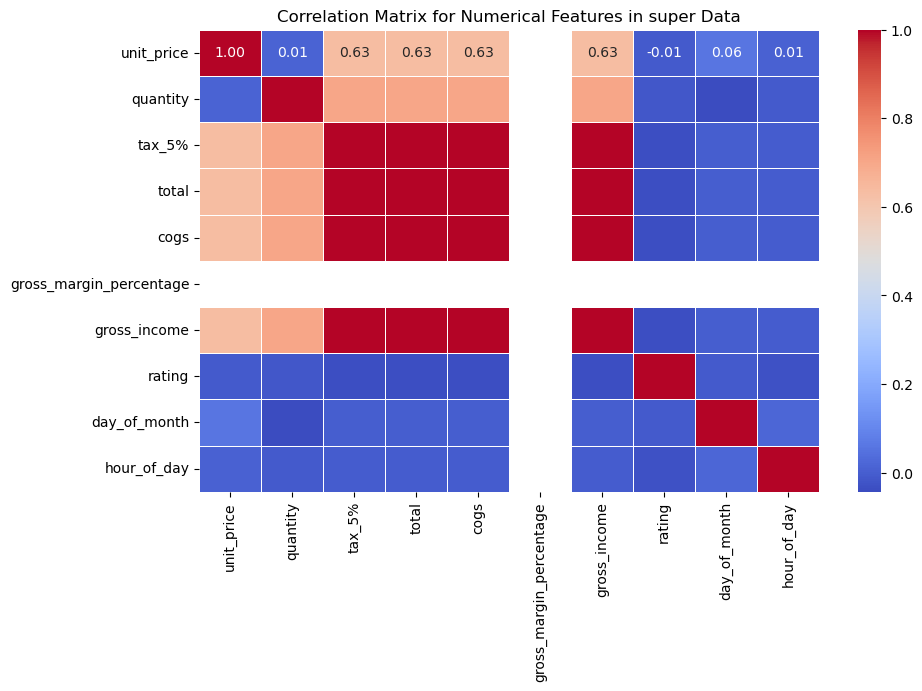

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numeric_cols = super.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features in super Data")
plt.show()
